In [9]:
import pandas as pd
import os
import folium
import plotly.express as px
import plotly.graph_objects as go
from plotly.subplots import make_subplots
import plotly.io as pio
pio.templates.default = "plotly_white"
os.listdir()

['.ipynb_checkpoints',
 '2011 Stack Overflow Survey Results.csv',
 '2024 Developer Survey.pdf',
 'citisalary.csv',
 'clevelanda (2).csv',
 'Data Visualization with Seaborn-3.ipynb',
 'dec_2022.png',
 'Dec_Anal.png',
 'Delhi-Metro-Network.csv',
 'Electric vehical.ipynb',
 'Electric_Vehicle_Population_Data.csv',
 'ETH_1h.csv',
 'first.ipynb',
 'first2.ipynb',
 'first3.ipynb',
 'first7.ipynb',
 'Food Delivery Cost and Profitability Analysis using Python.ipynb',
 'food_orders_new_delhi.csv',
 'hypi1.ipynb',
 'hypo-test.ipynb',
 'inherintance and cls method .ipynb',
 'iris.csv',
 'leading data 1.xlsx',
 'LinkedList.ipynb',
 'Marketing_conversion_data.xlsx',
 'mod.json',
 'mod.xlsx',
 'mod3.json',
 'modi.tsv',
 'modifided.csv',
 'new.py',
 'newfirst.ipynb',
 'panda and sea,polt and mat.ipynb',
 'Permits by sector 2024.xlsx',
 'Permits issued to companies 2024.xlsx',
 'plotly-4.ipynb',
 'python to mysql',
 'Real-Time Project on Probability Distribution & Hypothesis Testing.ipynb',
 'Sales Dat

In [11]:
metro_data=pd.read_csv('Delhi-Metro-Network.csv')
metro_data

,Station ID,Station Name,Distance from Start (km),Line,Opening Date,Station Layout,Latitude,Longitude
0,1,Jhil Mil,10.3,Red line,2008-04-06,Elevated,28.675790,77.312390
1,2,Welcome [Conn: Red],46.8,Pink line,2018-10-31,Elevated,28.671800,77.277560
2,3,DLF Phase 3,10.0,Rapid Metro,2013-11-14,Elevated,28.493600,77.093500
3,4,Okhla NSIC,23.8,Magenta line,2017-12-25,Elevated,28.554483,77.264849
4,5,Dwarka Mor,10.2,Blue line,2005-12-30,Elevated,28.619320,77.033260
...,...,...,...,...,...,...,...,...
280,281,Bata Chowk,38.3,Voilet line,2015-06-09,Elevated,28.385836,77.313462
281,282,Dwarka Sector 12,5.8,Blue line,2006-01-04,Elevated,28.592320,77.040510
282,283,Noida Sector 18,43.6,Blue line,2009-12-11,Elevated,28.570810,77.326120
283,284,Knowledge Park II,21.4,Aqua line,2019-01-25,Elevated,28.456867,77.500054


In [13]:
missing_values=metro_data.isnull().sum()

data_types =metro_data.dtypes

In [15]:

data_types

Station ID                    int64
Station Name                 object
Distance from Start (km)    float64
Line                         object
Opening Date                 object
Station Layout               object
Latitude                    float64
Longitude                   float64
dtype: object

In [16]:
missing_values


Station ID                  0
Station Name                0
Distance from Start (km)    0
Line                        0
Opening Date                0
Station Layout              0
Latitude                    0
Longitude                   0
dtype: int64

In [17]:
metro_data['Opening Date'] =pd.to_datetime(metro_data['Opening Date'])

In [37]:
line_colors = {
    'Red line': 'red',
    'Blue line': 'blue',
    'Yellow line': 'beige',
    'Green line': 'green',
    'Voilet line': 'purple',
    'Pink line': 'pink',
    'Magenta line': 'darkred',
    'Orange line': 'orange',
    'Rapid Metro': 'cadetblue',
    'Aqua line': 'black',
    'Green line branch': 'lightgreen',
    'Blue line branch': 'lightblue',
    'Gray line': 'lightgray'
}
delhi_map_with_line_tooltip =folium.Map(location=[28.7041, 77.1025], zoom_start=11)
for index, row in metro_data.iterrows():
    line = row['Line']
    color = line_colors.get(line, 'black')  
    folium.Marker(
        location=[row['Latitude'], row['Longitude']],
        popup=f"{row['Station Name']}",
        tooltip=f"{row['Station Name']}, {line}",
        icon=folium.Icon(color=color)).add_to(delhi_map_with_line_tooltip)
delhi_map_with_line_tooltip

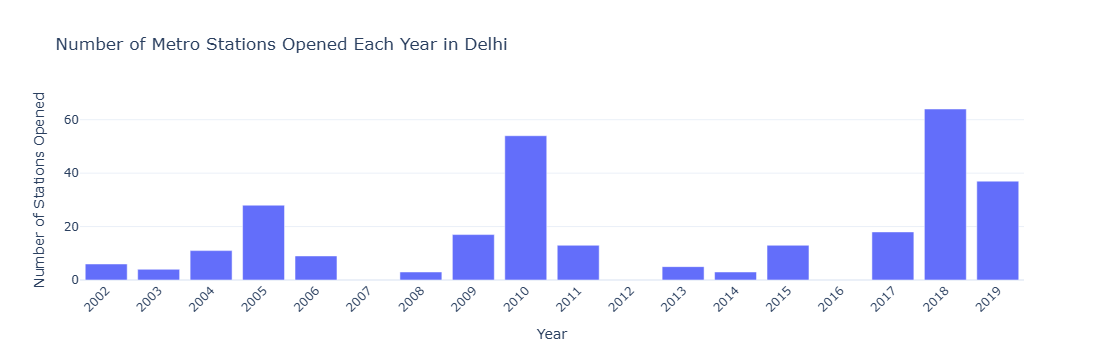

In [70]:
metro_data['opening year'] = metro_data['Opening Date'].dt.year

stations_per_year=metro_data['opening year'].value_counts().sort_index()

stations_per_year_df = stations_per_year.reset_index()

stations_per_year_df.columns=['Year','Number of Stations']


fig =px.bar(stations_per_year_df,x='Year',y='Number of Stations',
            title="Number of Metro Stations Opened Each Year in Delhi",
             labels={'Year': 'Year', 'Number of Stations': 'Number of Stations Opened'}
           )

fig.update_layout(xaxis_tickangle=-45, xaxis=dict(tickmode='linear'),
                  yaxis=dict(title='Number of Stations Opened'),
                  xaxis_title="Year")
fig.show()

In [96]:
stations_per_line = metro_data['Line'].value_counts()

total_distance_per_line=metro_data.groupby('Line')['Distance from Start (km)'].max()

avg_distance_per_line=total_distance_per_line/(stations_per_line-1)

line_analyis=pd.DataFrame({
    'Line' : stations_per_line.index,
    'Number of Stataions':stations_per_line.values,
    'Average Distance Between Stations (KM)':avg_distance_per_line
})
line_analysis = line_analysis.sort_values(by='Number of Stations',ascending=False)

line_analysis.reset_index(drop=True,inplace=True)
print(line_analysis)

                 Line  Number of Stations  \
0           Blue line                  49   
1           Pink line                  38   
2         Yellow line                  37   
3         Voilet line                  34   
4            Red line                  29   
5        Magenta line                  25   
6           Aqua line                  21   
7          Green line                  21   
8         Rapid Metro                  11   
9    Blue line branch                   8   
10        Orange line                   6   
11          Gray line                   3   
12  Green line branch                   3   

    Average Distance Between Stations (km)  
0                                 1.355000  
1                                 1.097917  
2                                 1.157143  
3                                 1.950000  
4                                 1.240000  
5                                 1.050000  
6                                 1.379167  
7        

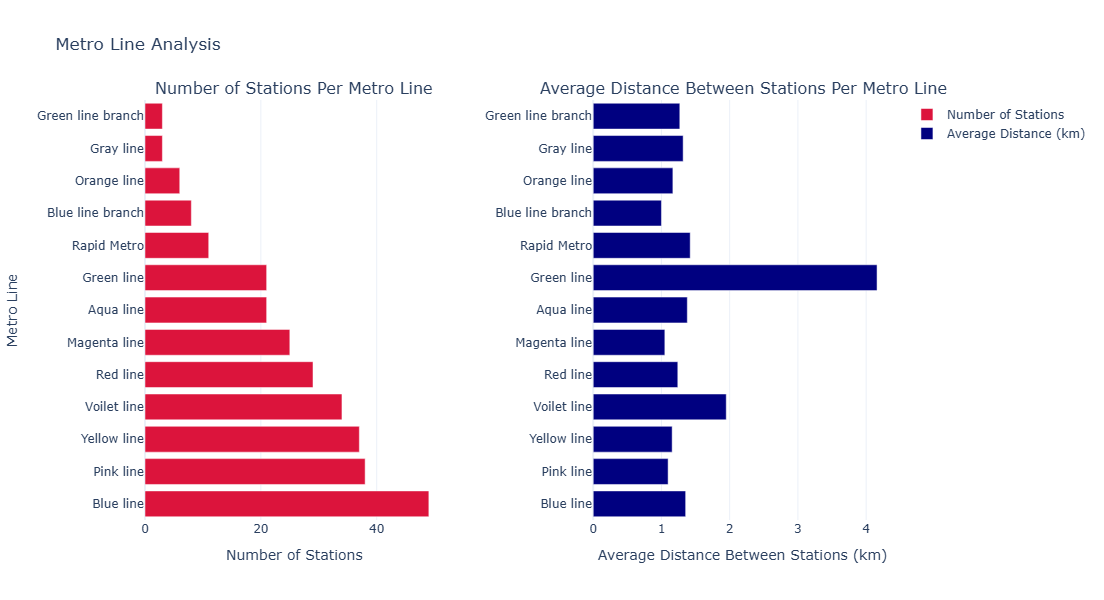

In [106]:
fig =make_subplots(rows=1,cols=2,subplot_titles=('Number of Stations Per Metro Line',
                                                 'Average Distance Between Stations Per Metro Line'),horizontal_spacing=0.2)
fig.add_trace(
    go.Bar(y=line_analysis['Line'],x=line_analysis['Number of Stations'],
                     orientation='h', name='Number of Stations', marker_color='crimson'),
    row=1, col=1)


fig.add_trace(
    go.Bar(y=line_analysis['Line'],x=line_analysis['Average Distance Between Stations (km)'],
                     orientation='h', name='Average Distance (km)', marker_color='navy'),
    row=1, col=2)

fig.update_xaxes(title_text="Number of Stations", row=1, col=1)
fig.update_xaxes(title_text="Average Distance Between Stations (km)", row=1, col=2)


fig.update_yaxes(title_text="Metro Line", row=1, col=1)
fig.update_yaxes(title_text="", row=1, col=2)


fig.update_layout(height=600, width=1200, title_text="Metro Line Analysis", template="plotly_white")

fig.show()

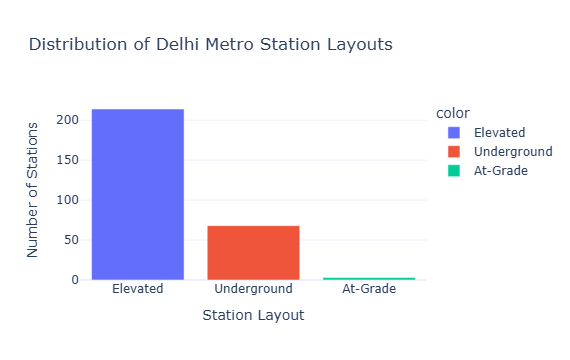

In [109]:
layout_counts=metro_data['Station Layout'].value_counts()

fig=px.bar(
    x=layout_counts.index, y=layout_counts.values,labels={'x': 'Station Layout', 'y': 'Number of Stations'},
             title='Distribution of Delhi Metro Station Layouts',
             color=layout_counts.index,
             color_continuous_scale='pastel')

fig.update_layout(xaxis_title="Station Layout",
                  yaxis_title="Number of Stations",
                  coloraxis_showscale=False,
                  template="plotly_white")

fig.show()
